In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import time

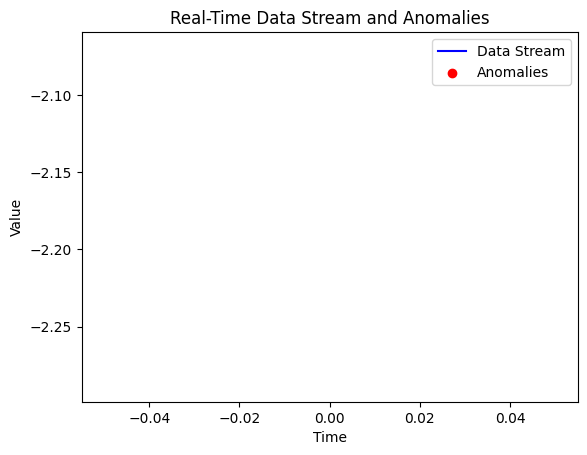

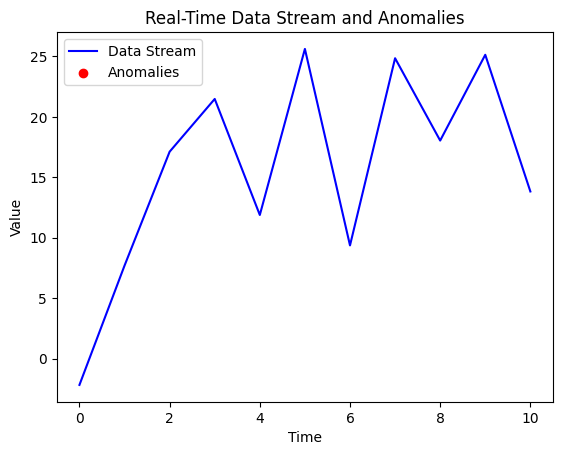

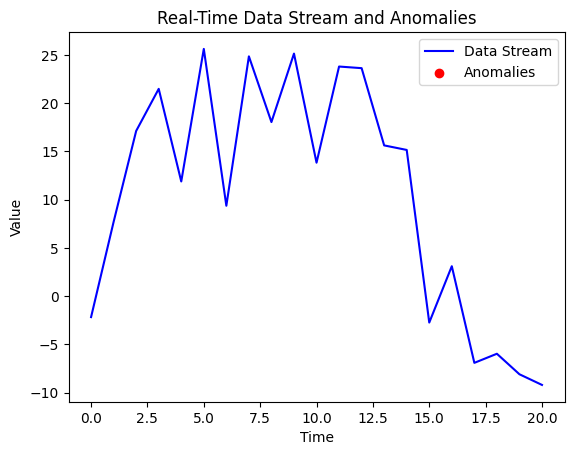

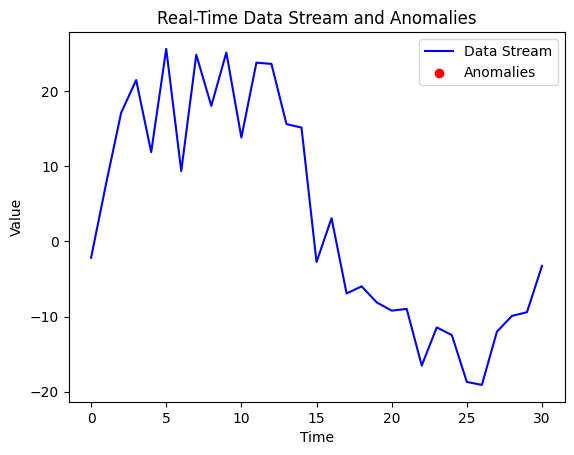

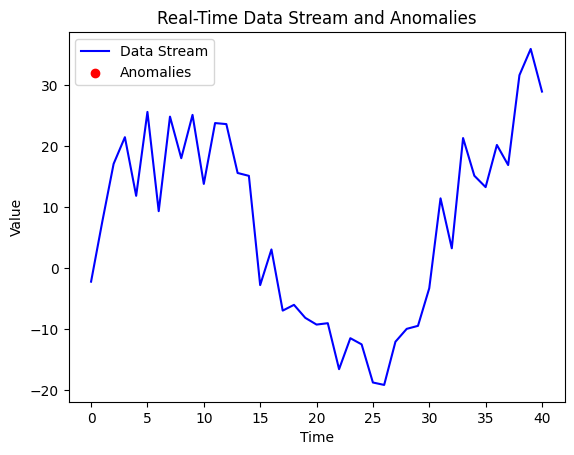

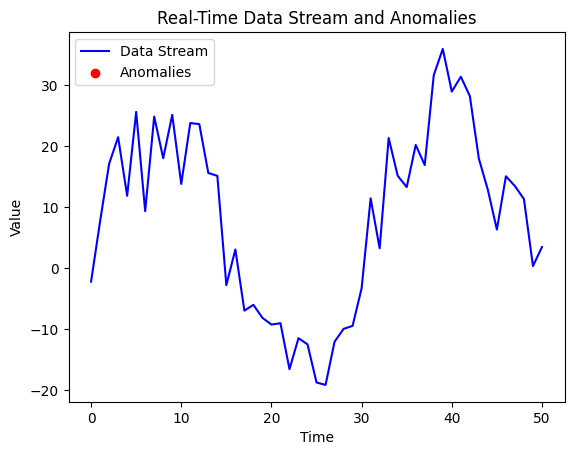

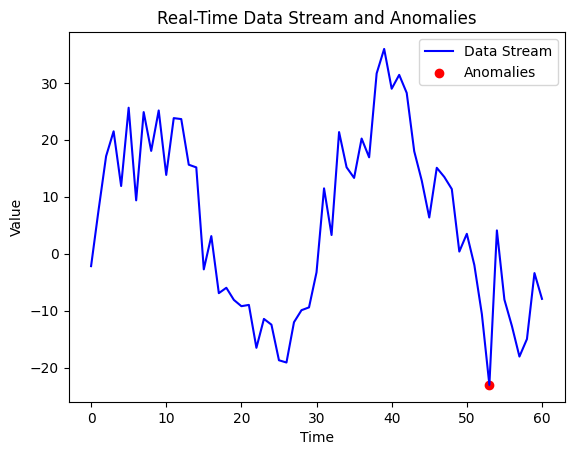

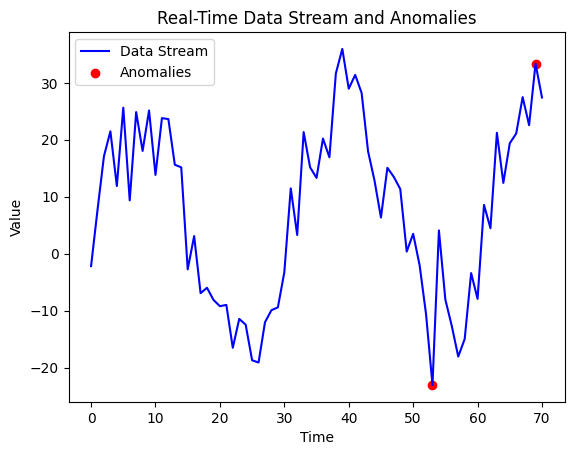

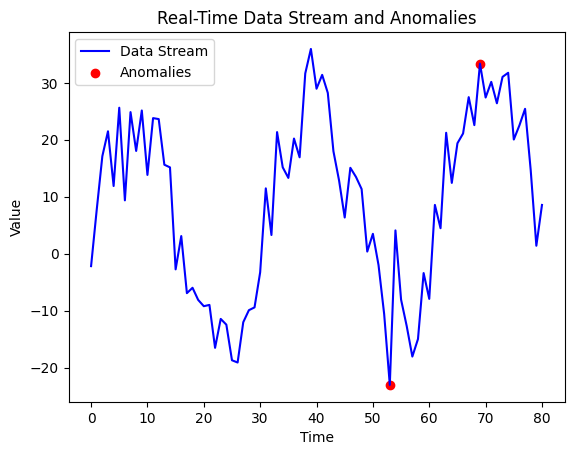

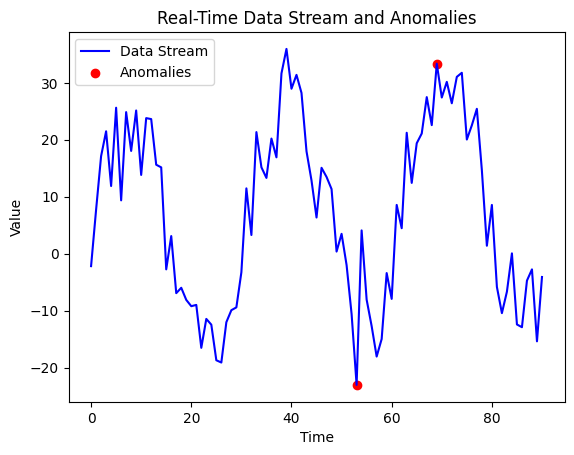

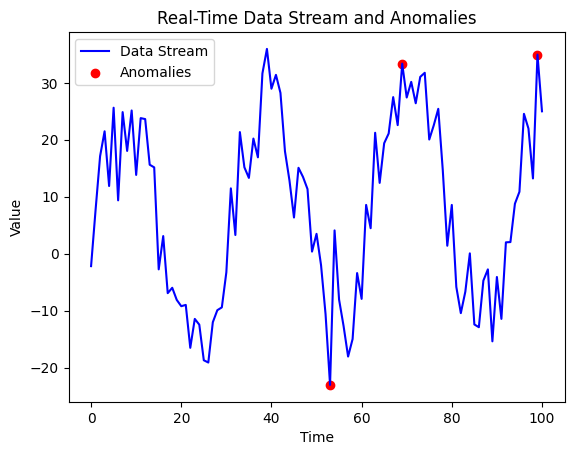

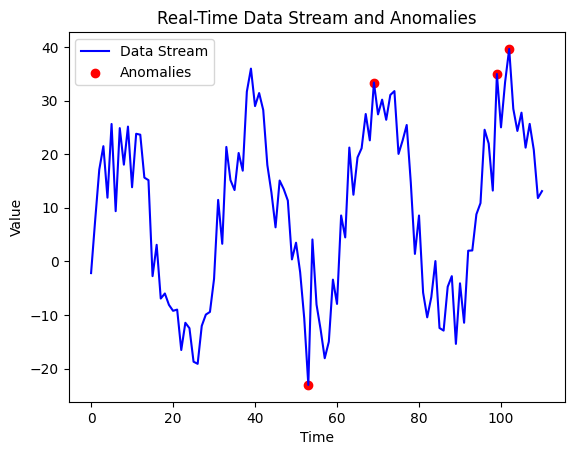

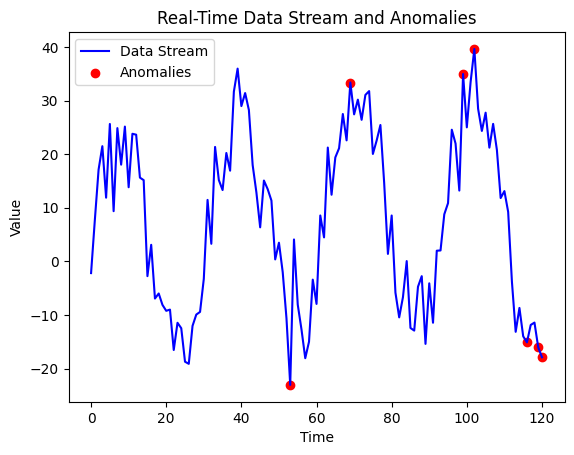

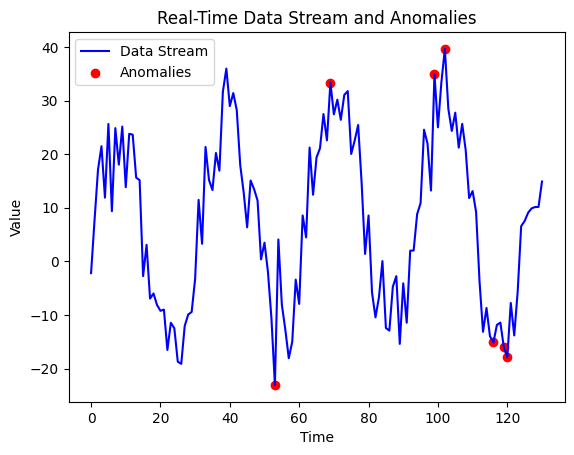

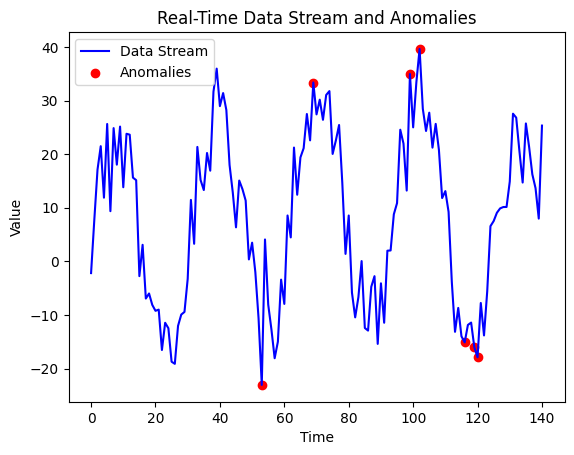

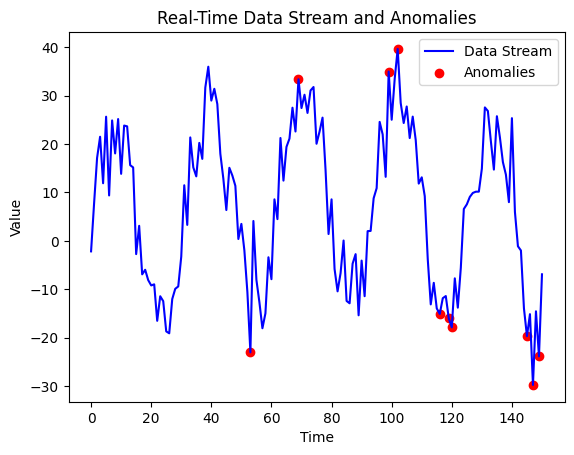

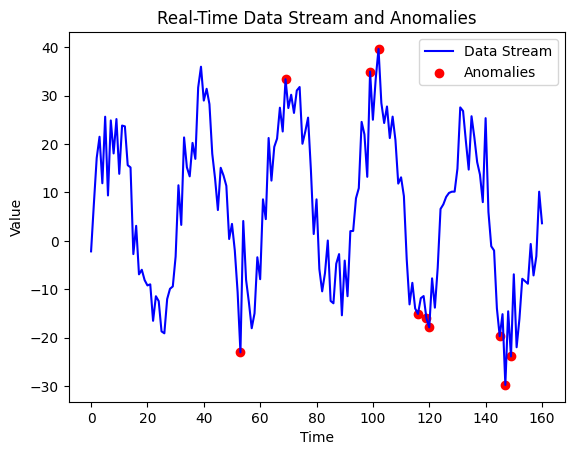

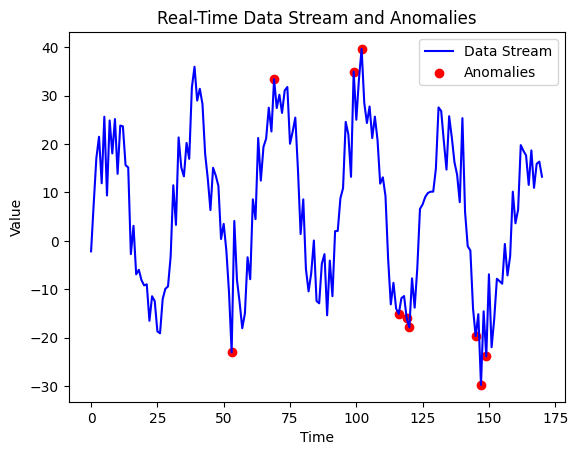

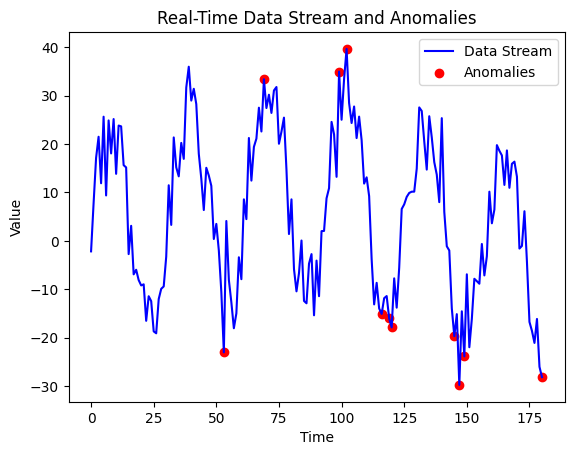

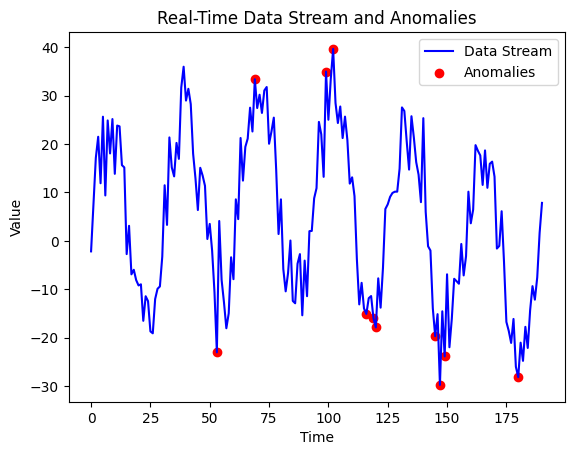

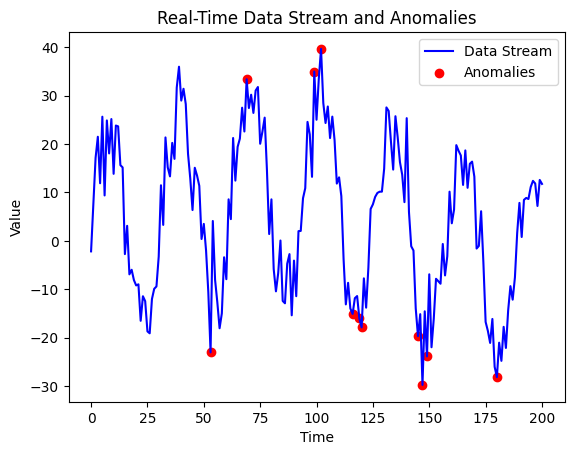

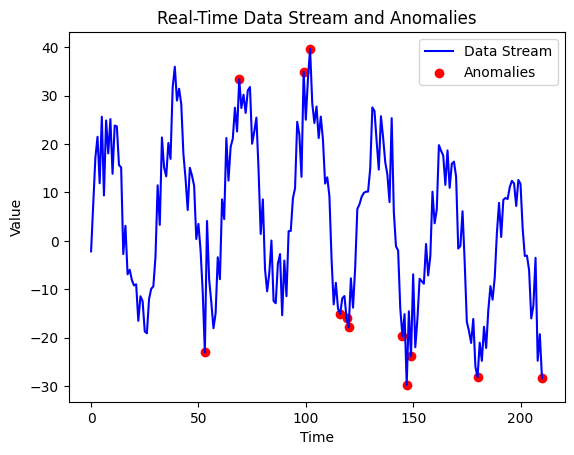

KeyboardInterrupt: ignored

In [11]:
class AnomalyDetector:
    def __init__(self, window_size, contamination):
        self.window_size = window_size
        self.contamination = contamination
        self.data = []
        self.model = IsolationForest(contamination=contamination)

    def add_data_point(self, data_point):
        self.data.append(data_point)
        if len(self.data) > self.window_size:
            self.data.pop(0)

    def detect_anomaly(self, new_data_point):
        self.add_data_point(new_data_point)

        if len(self.data) < self.window_size:
            return False  # Not enough data points for analysis

        X = np.array(self.data).reshape(-1, 1)
        self.model.fit(X)
        anomaly_score = self.model.decision_function([[new_data_point]])

        if anomaly_score < 0:
            return True  # Anomaly detected
        else:
            return False
    def simulate_data_stream(num_points):
    # Simulating data stream with regular patterns, seasonal elements, and random noise
      time_points = np.arange(num_points)
      data_stream = 20 * np.sin(0.2 * time_points) + 10 * np.sin(0.02 * time_points) + np.random.normal(0, 5, num_points)
      return data_stream
    def visualize_data_and_anomalies(data_stream, anomalies):
      plt.plot(data_stream, label='Data Stream', color='blue')
      plt.scatter(anomalies, [data_stream[i] for i in anomalies], color='red', label='Anomalies')
      plt.xlabel('Time')
      plt.ylabel('Value')
      plt.legend()
      plt.title('Real-Time Data Stream and Anomalies')
      plt.show()

    window_size = 50
    contamination = 0.05  # Adjust based on the expected proportion of anomalies

    # Instantiate the anomaly detector
    anomaly_detector = AnomalyDetector(window_size, contamination)
    num_points = 500
    data_stream = simulate_data_stream(num_points)
    detected_anomalies = []
    for i, data_point in enumerate(data_stream):
        if anomaly_detector.detect_anomaly(data_point):
            detected_anomalies.append(i)

        # Visualization (update every 10 points for better performance)
        if i % 10 == 0:
            visualize_data_and_anomalies(data_stream[:i+1], detected_anomalies)

    # Final visualization
    visualize_data_and_anomalies(data_stream, detected_anomalies)